### Train model

### Prepare train and valid data

In [3]:
import sys  
sys.path.insert(0, '../')

from scripts.data_generator import make_audio_gen


TRAIN_CORPUS = "../data_st/train_corpus.json"
VALID_CORPUS = "../data_st/valid_corpus.json"
MFCC_DIM = 13
SPECTOGRAM = False
EPOCHS = 13 # changed epoch from 2 to 10
MODEL_NAME = "model_1"
MINI_BATCH_SIZE = 40 #chamged size from 250 to 35
SORT_BY_DURATION=False
MAX_DURATION = 10.0

audio_gen = make_audio_gen(TRAIN_CORPUS, VALID_CORPUS, spectrogram=False, mfcc_dim=MFCC_DIM,
                           minibatch_size=MINI_BATCH_SIZE, sort_by_duration=SORT_BY_DURATION,
                           max_duration=MAX_DURATION)
# add the training data to the generator
audio_gen.load_train_data()
audio_gen.load_validation_data()

### Run training

In [4]:
import mlflow 
from scripts.train import train
from scripts.models import model_1
from scripts.char_map import char_map, index_map
EPOCHS = 15
MODEL_NAME = "model_1"
model = model_1(input_dim=13,
                filters=200,
                kernel_size=11, 
                conv_stride=2,
                conv_border_mode='valid',
                units=250,
                activation='relu',
                dropout_rate=0.3,
                number_of_layers=5,
                output_dim=len(char_map)+1)

train(audio_gen, input_to_softmax=model, model_name=MODEL_NAME, epochs=EPOCHS, minibatch_size=MINI_BATCH_SIZE)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 13)]        0         
_________________________________________________________________
layer_1_conv (Conv1D)        (None, None, 200)         28800     
_________________________________________________________________
conv_batch_norm (BatchNormal (None, None, 200)         800       
_________________________________________________________________
rnn_1 (GRU)                  (None, None, 250)         339000    
_________________________________________________________________
bt_rnn_1 (BatchNormalization (None, None, 250)         1000      
_________________________________________________________________
rnn_2 (GRU)                  (None, None, 250)         376500    
_________________________________________________________________
bt_rnn_2 (BatchNormalization (None, None, 250)         1000

/home/nebiyu_sugamo/anaconda2/envs/speech/lib/python3.6/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021/08/11 04:09:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8533e3776df3497db45d1f9a99250553', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current keras workflow


boqa
Epoch 1/15
67/67 [==============================] - 185s 2s/step - loss: 215.0188 - val_loss: 159.5192
Epoch 2/15
67/67 [==============================] - 144s 2s/step - loss: 116.1381 - val_loss: 110.3269
Epoch 3/15
67/67 [==============================] - 145s 2s/step - loss: 94.8321 - val_loss: 102.5795
Epoch 4/15
67/67 [==============================] - 143s 2s/step - loss: 88.1002 - val_loss: 96.1547
Epoch 5/15
67/67 [==============================] - 145s 2s/step - loss: 84.3507 - val_loss: 89.9847
Epoch 6/15
67/67 [==============================] - 145s 2s/step - loss: 79.4310 - val_loss: 86.4032
Epoch 7/15
67/67 [==============================] - 146s 2s/step - loss: 78.0315 - val_loss: 85.5641
Epoch 8/15
67/67 [==============================] - 146s 2s/step - loss: 75.1770 - val_loss: 86.4032
Epoch 9/15
67/67 [==============================] - 146s 2s/step - loss: 73.8487 - val_loss: 83.1787
Epoch 10/15
67/67 [==============================] - 145s 2s/step - loss: 71.7756

2021/08/11 04:46:40 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/nebiyu_sugamo/anaconda2/envs/speech/lib/python3.6/site-packages/mlflow/keras.py:680: UserWarning: Logging to MLflow failed: Unable to infer keras module from the model, please specify which keras module ('keras' or 'tensorflow.keras') is to be used to save and load the model."


### Load saved model

In [5]:
from scripts.char_map import char_map, index_map
from scripts.models import model_1

model = model_1(input_dim=13,
                filters=200,
                kernel_size=11, 
                conv_stride=2,
                conv_border_mode='valid',
                units=250,
                activation='relu',
                dropout_rate=0.5,
                number_of_layers=5,
                output_dim=len(char_map)+1)
model_name = "model_1"
model.load_weights('../models/' + model_name + '.h5')

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 13)]        0         
_________________________________________________________________
layer_1_conv (Conv1D)        (None, None, 200)         28800     
_________________________________________________________________
conv_batch_norm (BatchNormal (None, None, 200)         800       
_________________________________________________________________
rnn_1 (GRU)                  (None, None, 250)         339000    
_________________________________________________________________
bt_rnn_1 (BatchNormalization (None, None, 250)         1000      
_________________________________________________________________
rnn_2 (GRU)                  (None, None, 250)         376500    
_________________________________________________________________
bt_rnn_2 (BatchNormalization (None, None, 250)         1000

### Loss

2021/08/11 04:47:42 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of keras. If you encounter errors during autologging, try upgrading / downgrading keras to a supported version, or try upgrading MLflow.


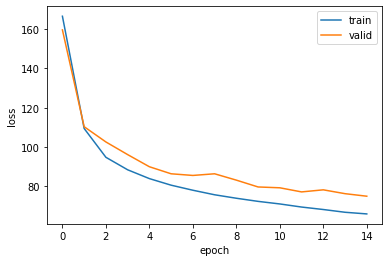

In [6]:
from scripts.plot import plot_hist
%matplotlib inline
model_name = "model_1"
plot_hist(model_name)